In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edl
import plotting

%matplotlib widget

In [2]:
potentials = np.linspace(-0.4, 0.4, 100)

x_list = [0, 2, 6, 25, 100]
sol_list = []

for x in x_list:
    model = edl.Abrashkin(1e-3 + x*1e-3, 60, 8)
    sol = model.sweep(potentials)
    
    sol_list.append(sol)

Sweep from 0.00V to -0.40V. Maximum relative residual: 3.50692e-05.
Sweep from 0.00V to 0.40V. Maximum relative residual: 3.48263e-05.
Sweep from 0.00V to -0.40V. Maximum relative residual: 3.11959e-05.
Sweep from 0.00V to 0.40V. Maximum relative residual: 3.62615e-05.
Sweep from 0.00V to -0.40V. Maximum relative residual: 3.32712e-05.
Sweep from 0.00V to 0.40V. Maximum relative residual: 3.32362e-05.
Sweep from 0.00V to -0.40V. Maximum relative residual: 3.11621e-05.
Sweep from 0.00V to 0.40V. Maximum relative residual: 3.61086e-05.
Sweep from 0.00V to -0.40V. Maximum relative residual: 3.35075e-05.
Sweep from 0.00V to 0.40V. Maximum relative residual: 3.32578e-05.


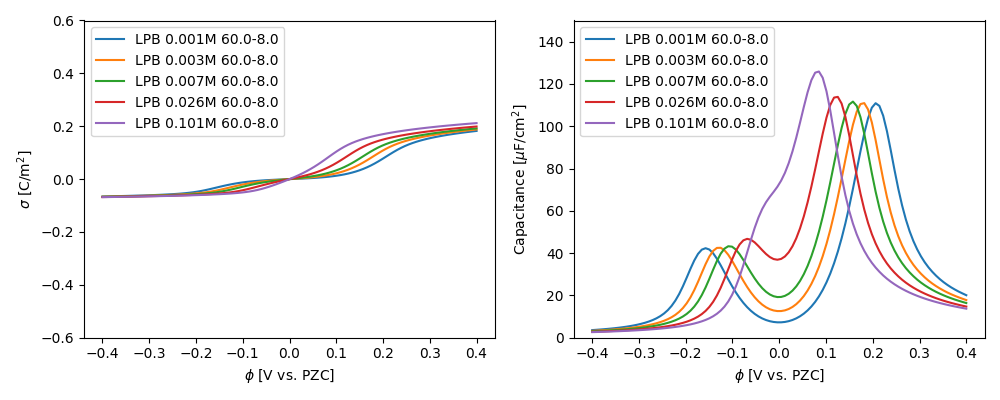

In [3]:
fig, ax = plotting.plot_potential_sweep(sol_list)
plt.show()